In [32]:
import pandas as pd
df=pd.DataFrame({"Name":["Jack","Tom","Tina","Albert","Mohan","Nina","Elon Musk"],
               "Income":[5000,6000,4000,7500,8000,7000,10000000]})
print(df)

        Name    Income
0       Jack      5000
1        Tom      6000
2       Tina      4000
3     Albert      7500
4      Mohan      8000
5       Nina      7000
6  Elon Musk  10000000


In [33]:
# To find mean of numerical column
df.Income.mean() 

1433928.5714285714

In [4]:
# To find median of numerical column
df.Income.median()

7000.0

There is a significant deifference between mean and median. Indicating presence of outliers.

In [5]:
# Inserting a null value
import numpy as np
df.loc[3,'Income']=np.nan
df

,Name,Income
0,Jack,5000.0
1,Tom,6000.0
2,Tina,4000.0
3,Albert,NaN
4,Mohan,8000.0
5,Nina,7000.0
6,Elon Musk,10000000.0


In [6]:
# quantile() will give you percentiles
df.Income.quantile([0.25,0.5,0.75,0.8,0.81,0.82])

0.25       5250.0
0.50       6500.0
0.75       7750.0
0.80       8000.0
0.81     507600.0
0.82    1007200.0
Name: Income, dtype: float64

In [7]:
# There is a significatnt variation between 80th percentile and 81st percentile, Indicating presence of outliers. 
df[df.Income >df.Income.quantile(0.80)] #outlier

,Name,Income
6,Elon Musk,10000000.0


In [8]:
#Here median is used to fill the null value as the data contains outliers
df1=df.fillna(df.Income.median()) 
df1

,Name,Income
0,Jack,5000.0
1,Tom,6000.0
2,Tina,4000.0
3,Albert,6500.0
4,Mohan,8000.0
5,Nina,7000.0
6,Elon Musk,10000000.0


In [9]:
df1.Income.quantile([0.8,0.81,0.82,0.83,0.84])

0.80      7800.0
0.81      7860.0
0.82      7920.0
0.83      7980.0
0.84    407680.0
Name: Income, dtype: float64

In [10]:
# data without outliers. 
df_no_outlier=df1[df1.Income < df1.Income.quantile(0.84)]
df_no_outlier

,Name,Income
0,Jack,5000.0
1,Tom,6000.0
2,Tina,4000.0
3,Albert,6500.0
4,Mohan,8000.0
5,Nina,7000.0


#### In this way find out the values for different percentiles and check whether there exist outliers. 
#### This is how outliers are find out and treated using percentile

### IQR

In [11]:
# using IQR
q1=df1.Income.quantile(0.25)
print("q1 = ",q1)
q3=df1.Income.quantile(0.75)
print("q3 = ",q3)
IQR=q3-q1
print("IQR = ",IQR)

q1 =  5500.0
q3 =  7500.0
IQR =  2000.0


In [12]:
lower_whisker=q1-1.5*IQR
upper_whisker=q3+1.5*IQR
lower_whisker,upper_whisker

(2500.0, 10500.0)

In [13]:
df1[(df1.Income<2500) | (df1.Income>10500)]  #outliers

,Name,Income
6,Elon Musk,10000000.0


In [14]:
df1_without_outlier=df1[(df1.Income>2500) & (df1.Income<10500)]   #without outliers

In [15]:
df1_without_outlier

,Name,Income
0,Jack,5000.0
1,Tom,6000.0
2,Tina,4000.0
3,Albert,6500.0
4,Mohan,8000.0
5,Nina,7000.0


#### Dataset - Height & Weight

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: xlabel='Height', ylabel='Count'>

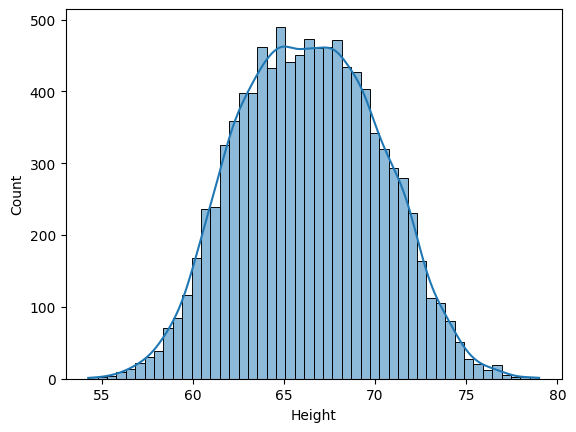

In [18]:
sns.histplot(data=df,x=df.Height,kde=True)  #bell curve , normal distribution

In [19]:
m=df.Height.mean()
m

66.36755975482124

In [20]:
s=df.Height.std()
s

3.8475281207732293

In [21]:
#-3sigma
m-3*s

54.82497539250156

In [22]:
# +3sigma
m+3*s

77.91014411714093

In [23]:
df[(df.Height >54) & (df.Height <77)]  # data without outliers

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


#### 10000 rows reduced to 9988 rows by removing 12 outliers

### Z score= (x-mean)/std

In [24]:
# zscore of height column 
df["ZScore"]=(df.Height-m)/s     #The height 73.847017 is 1.943964 sigma away from the mean value
df

,Gender,Height,Weight,ZScore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [25]:
df[(df.ZScore > -3)&(df.ZScore < 3)]  # data without outliers

,Gender,Height,Weight,ZScore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


### Correlation

In [26]:
df1=df.drop(["Gender","ZScore",],axis=1)
df1

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [27]:
#finding correlation between height and weight
corr1=df1.corr()
corr1

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


<Axes: >

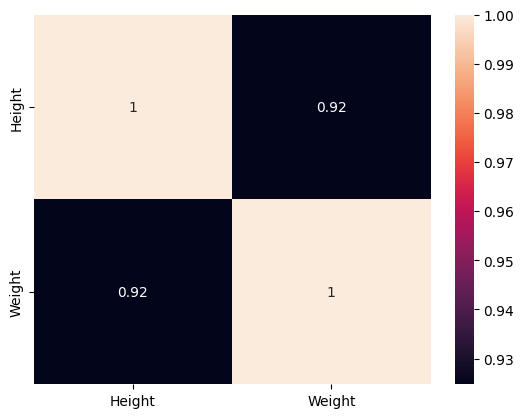

In [28]:
sns.heatmap(corr1,annot=True)

### Skewness & Kurtosis

In [29]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from scipy.stats import skew,kurtosis
import pandas as pd
import numpy as np

In [12]:
df=pd.read_csv("Housing-Prices-master-train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
#There are 81 columns in this datase. From this,Finding out skewness and kurtosis for the SalePrice Column
df["SalePrice"].describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

mean=180921
median=163000
75% = 214000
max = 755000
There is a significant difference between 75% and maximum value.

C:\Users\jisma\AppData\Local\Temp\ipykernel_3436\1595025023.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"],color='r') # right skewed distribution. There is a tail


<Axes: xlabel='SalePrice', ylabel='Density'>

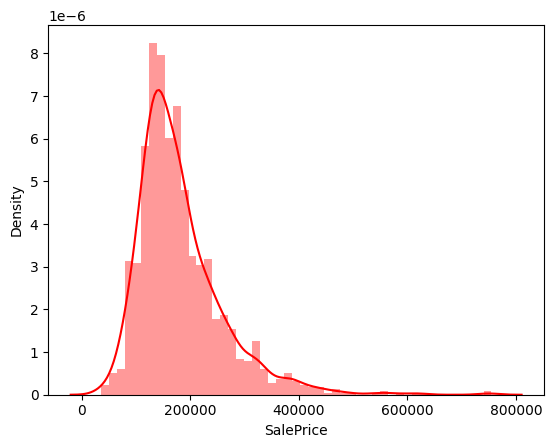

In [16]:
import seaborn as sns
sns.distplot(df["SalePrice"],color='r') # right skewed distribution. There is a tail

# A Distplot or distribution plot, depicts the variation in the data distribution. 

In [17]:
df['SalePrice'].skew()  #value indicating highly skewed , greater than 1 (+ve value indicates right skewed)

1.8828757597682129

In [18]:
kurtosis(df['SalePrice'],fisher=False)  #kurtosis >3 - leptokurtic

9.509812011089439

In [19]:
df['log_Saleprice']=np.log(df["SalePrice"]) #logarithmic transformation to tackle skewness

In [20]:
df['log_Saleprice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: log_Saleprice, Length: 1460, dtype: float64

C:\Users\jisma\AppData\Local\Temp\ipykernel_3436\1625447973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["log_Saleprice"],color='r')


<Axes: xlabel='log_Saleprice', ylabel='Density'>

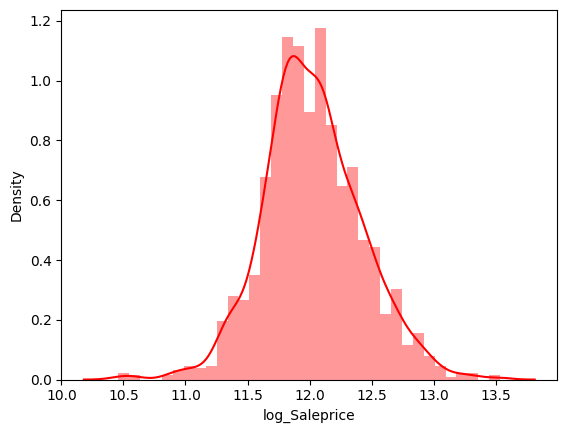

In [21]:
sns.distplot(df["log_Saleprice"],color='r')

In [22]:
df['log_Saleprice'].skew()  #less skewed

0.12133506220520406

In [23]:
kurtosis(df['log_Saleprice'],fisher=False)

3.8026555069117713